<a href="https://colab.research.google.com/github/ShreyaSutar2004/Cancer_Gene/blob/main/Genomic_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
!pip install kaggle

In [ ]:
creden=json.load(open('/content/kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=creden['username']
os.environ['KAGGLE_KEY']=creden['key']

In [ ]:
# loading the dataset
!kaggle datasets download -d brsahan/genomic-data-for-cancer

Dataset URL: https://www.kaggle.com/datasets/brsahan/genomic-data-for-cancer
License(s): apache-2.0


In [ ]:
!unzip /content/gdc.zip

Archive:  /content/gdc.zip
  inflating: gene_expression.csv     


In [ ]:
cancer=pd.read_csv('/content/gene_expression.csv')
cancer

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [ ]:
genomic_data=pd.DataFrame(cancer)
genomic_data.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
missing_values=genomic_data.isna()

for values in missing_values:
  print(missing_values[values].value_counts())
  print(' ')

Gene One
False    3000
Name: count, dtype: int64
 
Gene Two
False    3000
Name: count, dtype: int64
 
Cancer Present
False    3000
Name: count, dtype: int64
 


In [ ]:
X=genomic_data.iloc[:,:-1]
y=genomic_data.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model_details= {
    'Logistic Regression':{
        'model':LogisticRegression(solver='liblinear'),
        'params':{
            'C':[1,5,10]
        }
    },
    'Decision Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100]
        }
    },
    'SVC':{
        'model':SVC(),
        'params':{
            'C':[1,5,10]
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,7]
        }
    }



  }


In [ ]:
scores=[]

for model_name,model_params in model_details.items():
  clf=GridSearchCV(model_params['model'],model_params['params'],cv=5, return_train_score=False,scoring='accuracy')
  clf.fit(X_train,Y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })


In [ ]:
scores=pd.DataFrame(data=scores,columns=['model','best_score','best_params'])
scores

,model,best_score,best_params
0,Logistic Regression,0.857917,{'C': 1}
1,Decision Tree,0.905833,{'criterion': 'entropy'}
2,Random Forest,0.914167,{'n_estimators': 50}
3,SVC,0.932500,{'C': 5}
4,KNN,0.929583,{'n_neighbors': 5}


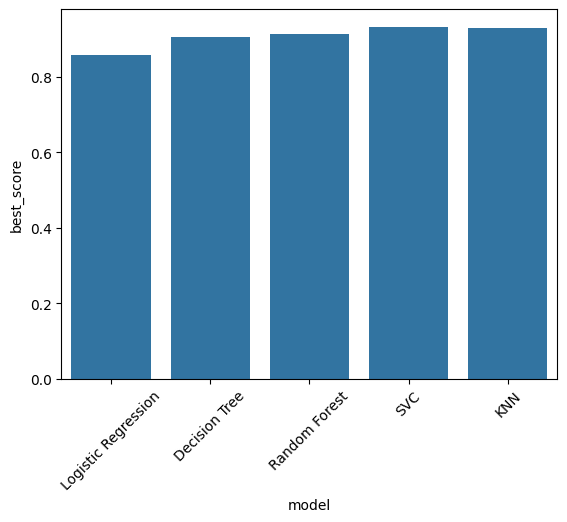

In [ ]:
sns.barplot(x='model',y='best_score',data=scores)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Predicting the values with best model
def predict_cancer_type(gene1, gene2):

  input_Data=[[gene1,gene2]]
  scaled_data=scaler.transform(input_Data)

  model=KNeighborsClassifier(n_neighbors=3)
  model.fit(X_train,Y_train)

  prediction=model.predict(scaled_data)[0]

  return 1 if prediction==1 else 0




In [ ]:
  gene1=2.5
  gene2=6.3
  prediction=predict_cancer_type(gene1,gene2)
  print(f'Prediction: {prediction}')

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
